# Geovista interactive 3D Globe visualization

👉 **This demo only runs with a custom image. Make sure you provided `'quay.io/jbusecke/pangeo_pyvista_docker_image:3efb811bc32b'` at startup** 👈

## How to restart your server:
Go to the Hub Control Panel
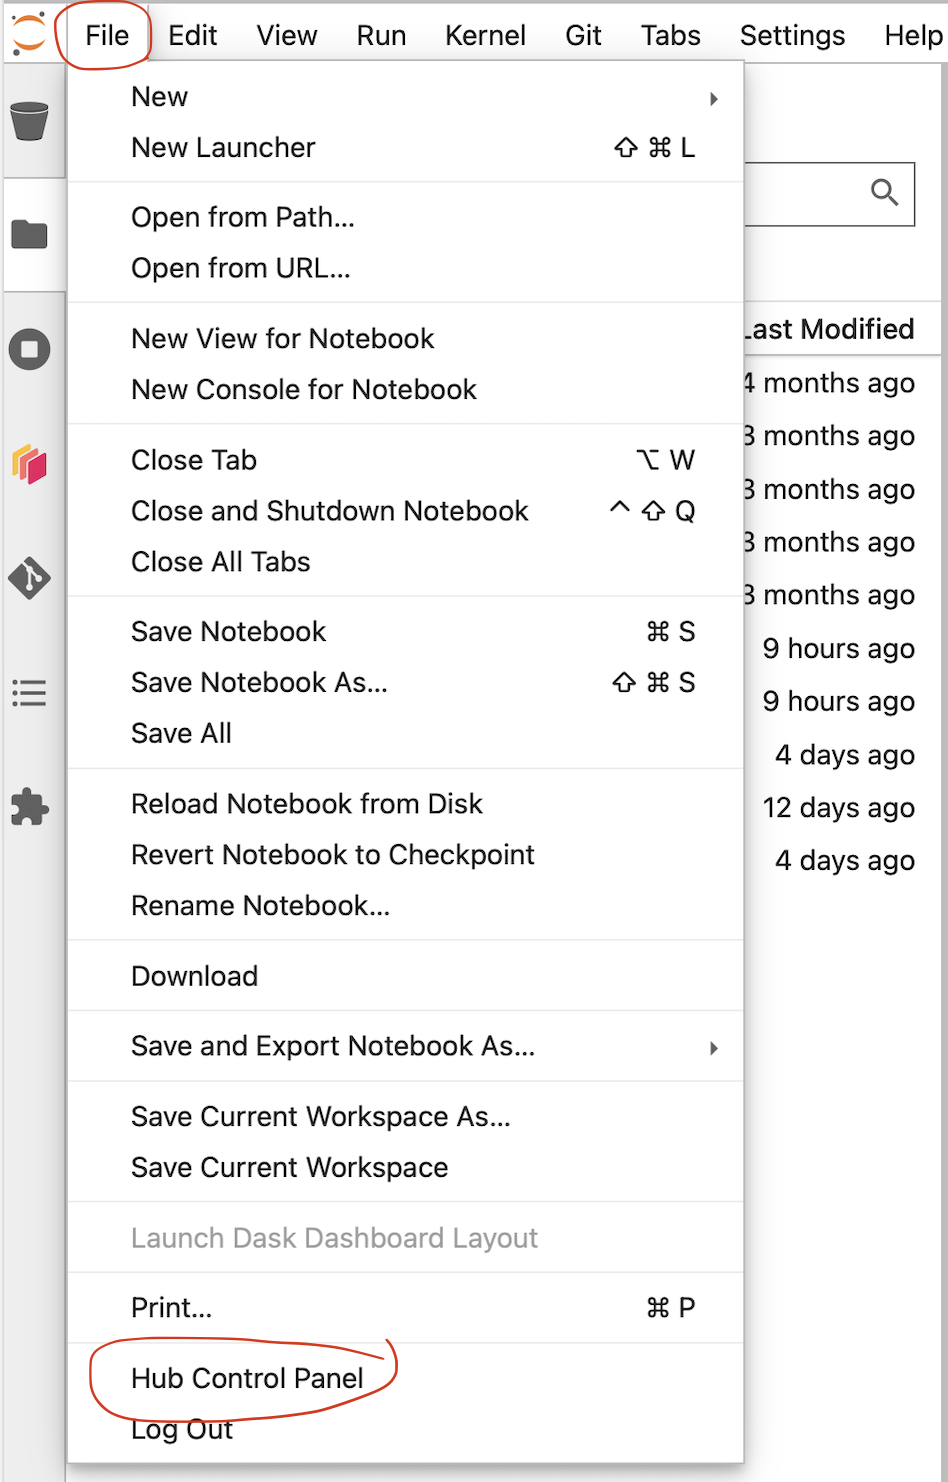

Press the 'Stop My Server' button
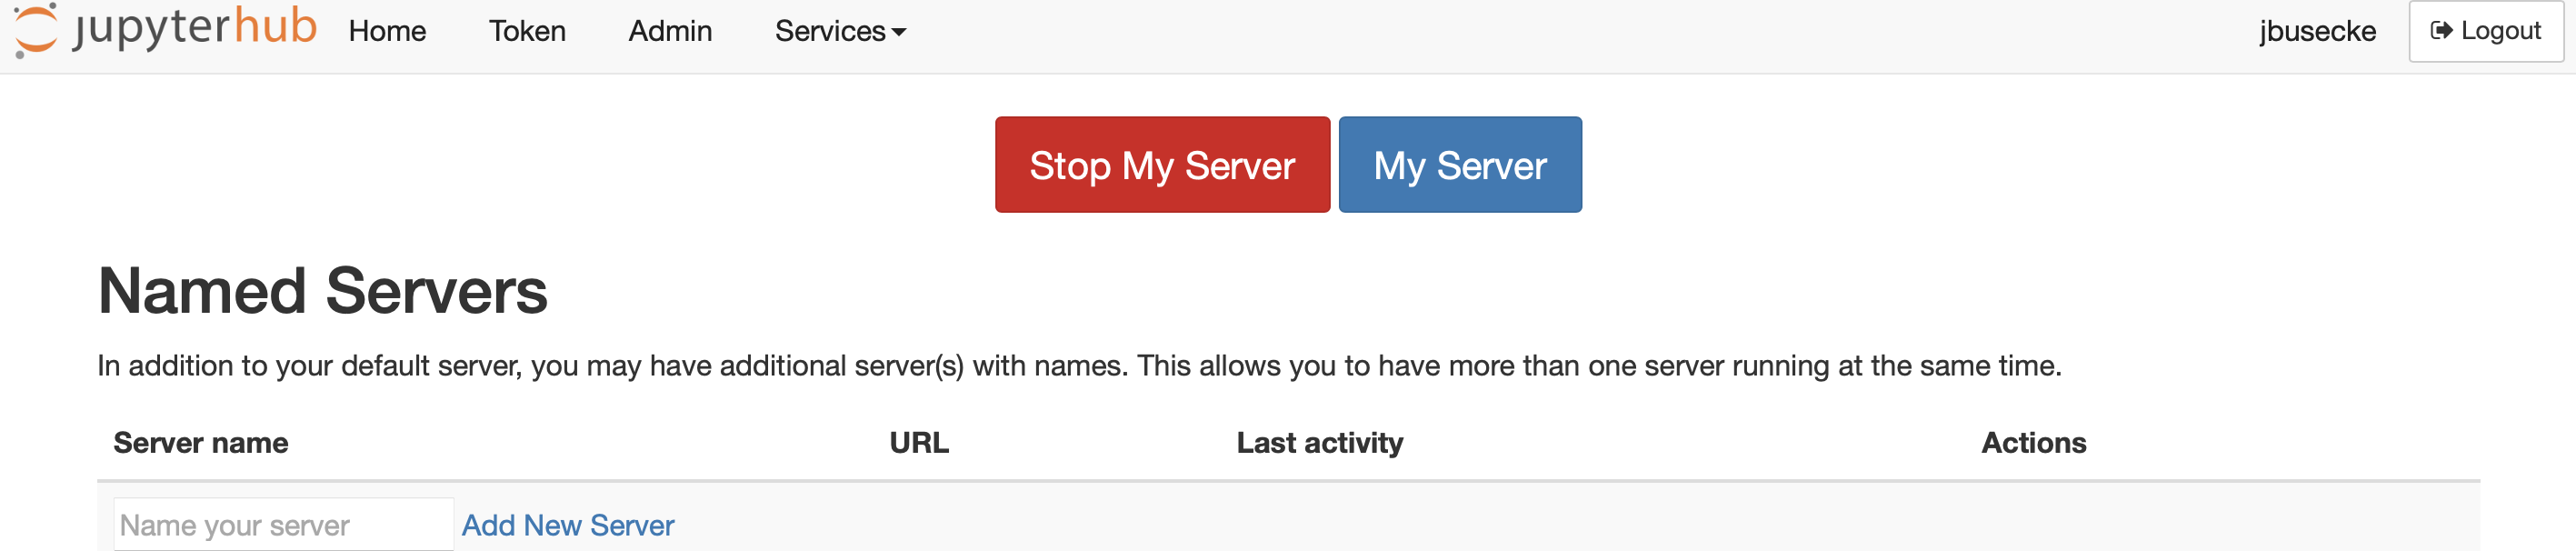

Start a new Server and choose "Other" as image option
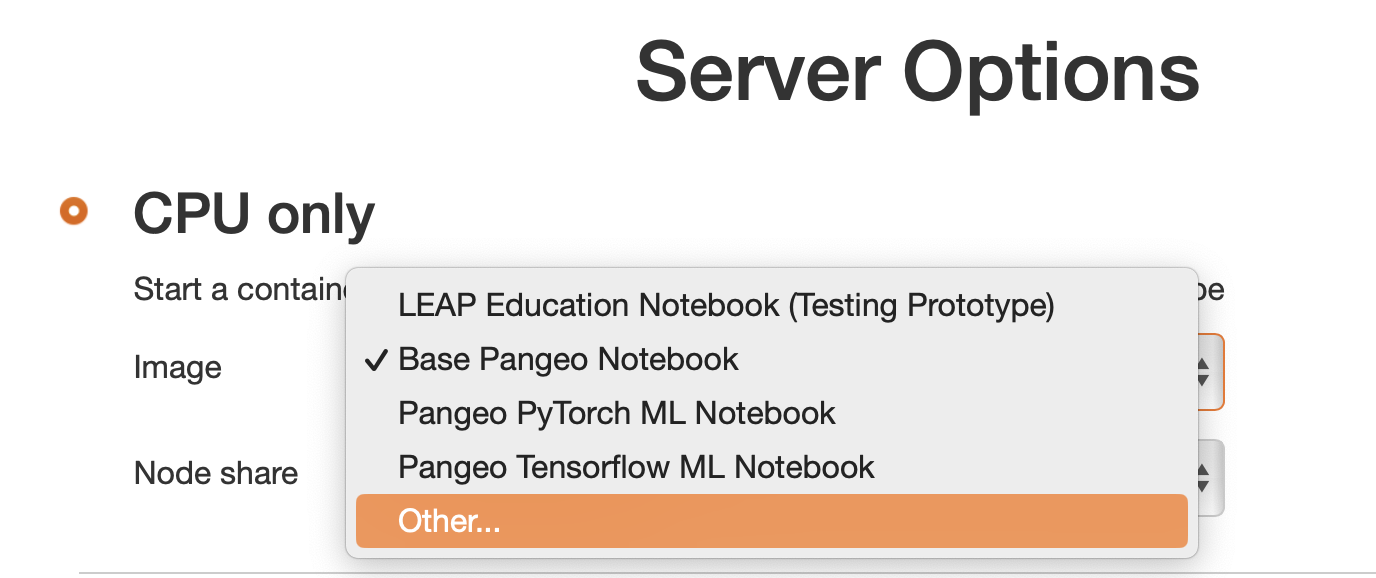

And paste the custom image in the text field
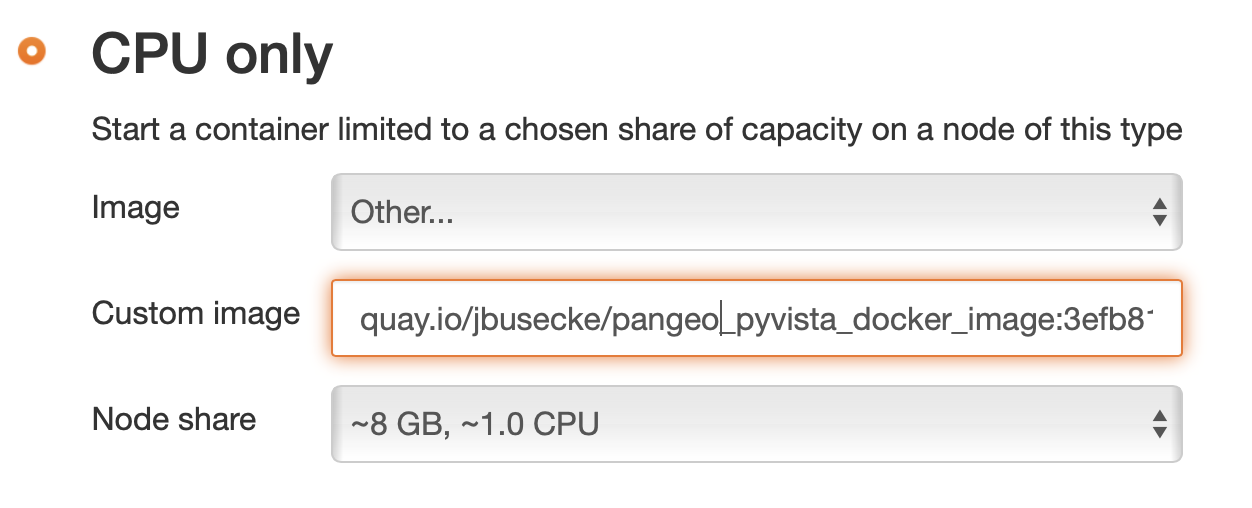

In [11]:
import xarray as xr
import geovista as gv
import geovista.theme
import pyvista as pv
import numpy as np
from tqdm.auto import tqdm
pv.set_jupyter_backend("server") #https://github.com/pyvista/pyvista/issues/4652
pv.global_theme.trame.server_proxy_enabled = True

In [16]:
path = 'gs://leap-persistent-ro/data-library/cmip6-testing/a618127503-6099939925-3/CMIP6.CMIP.IPSL.IPSL-CM6A-LR.historical.r33i1p1f1.Omon.chl.gn.v20211229.zarr'
ds = xr.open_dataset(
    path,
    engine='zarr',
    chunks={}
)
surf_chl = ds['chl'].isel(olevel=0)
surf_chl

<xarray.DataArray 'chl' (time: 1980, y: 332, x: 362)>
dask.array<getitem, shape=(1980, 332, 362), dtype=float32, chunksize=(6, 332, 362), chunktype=numpy.ndarray>
Coordinates:
    area     (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lat  (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    nav_lon  (y, x) float32 dask.array<chunksize=(332, 362), meta=np.ndarray>
    olevel   float32 0.5058
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello volume: volcello
    cell_methods:        area: mean where sea time: mean
    description:         sum of chlorophyll from all phytoplankton group conc...
    history:             none
    interval_operation:  2700 s
    interval_write:      1 month
    long_name:           Mass Concentration of Total Phytoplankton expressed ...
    online_operation:    average
    standard_name:       mass_concentration_of_phytoplankton_expressed_as_chl...
    units:               kg m-3

In [23]:
p = gv.GeoPlotter()
p.add_base_layer(texture=gv.natural_earth_1())

# create the mesh with no data payload
mesh = gv.Transform.from_2d(
    surf_chl.nav_lon,
    surf_chl.nav_lat,
    surf_chl.isel(time=0).data
)

# remove nans
mesh = mesh.threshold()

# this will add the named "data-frame" mesh to the plotter or replace it
p.add_mesh(mesh)

p.camera_position = 'xz'
p.show()

Widget(value="<iframe src='/user/jbusecke/proxy/44881/index.html?ui=P_0x7f4dba8f0910_6&reconnect=auto' class='…